# Dimension Reduction

Nowadays, a lot of attributes are recorded for an individual. In order to fit a simple model, some sort of dimension reduction seems necessary. Mathematically dimension reduction is projection of data into a lower dimensional space. There are various reasons why dimension reduction is an interesting technique.

- Can be used for data visualization in high-dimensions.
- The reduced dimensions can be used as new attributes for a better prediction.













# Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd
path='data/'
filename = path+'Auto.csv'
auto = pd.read_csv(filename, na_values=['?'], na_filter=True)
auto = auto.dropna()

In [2]:
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
# only quantitative variables
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = auto['mpg']

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.values)
Z = pca.transform(X)


from sklearn.preprocessing import scale

X_std = scale(X.values)
pca_std = PCA(n_components=2)
pca_std.fit(X_std)
Z_std = pca_std.transform(X_std)



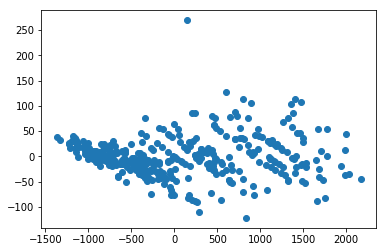

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Z[:,0], Z[:,1]);

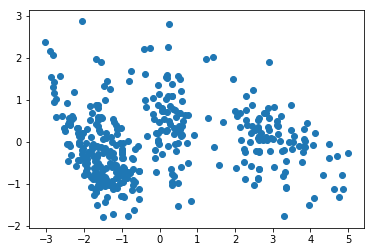

In [6]:
# Now Z includes a summary of X only in two dimensions. 
plt.scatter(Z_std[:,0], Z_std[:,1]);

# Lesson
Principal components of the data matrix and the stadardized data matrix are different.


# Principal Component Regression
We may use principal compoenents as attributes to feed a linear regression. Often it provides a better prediction in low dimensions.


In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_simple = X[['horsepower']]
lr.fit(X_simple,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
lr.score(X_simple, y)

0.60594825788943485

In [9]:
pcr = LinearRegression()
Z_simple = Z[:,0].reshape(-1,1)
pcr.fit(Z_simple, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
pcr.score(Z_simple,y)

0.69344892994286123

# Partial Least Squares
It makes sense if we want to project X matrix for predicting some y, make the projection function of y. This can be regarded as the right projection method for linear regression. Pfteh PLS project is slightly different version of PCA, though the algorithm takes account for y while projecting data.



In [11]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=2)
pls.fit(X, y)
W = pls.transform(X)

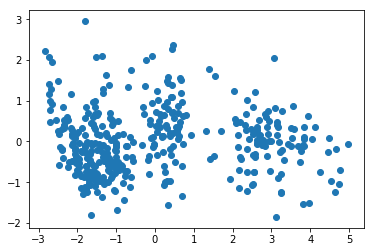

In [12]:
plt.scatter(W[:,0], W[:,1]);

In [13]:
pls.score(X,y)

0.69751780231942728

# Zip code data
While data are high dimensional PCA is the right method for data visualization.


In [14]:
path='data/'
filename = path+'ziptrain.csv'
import numpy as np
zipdata = np.loadtxt("data/ziptrain.csv")
zipdata.shape


(7291, 257)

# Data structure
The first column is the digit, the remaining 256 are pixes of a 16X16 grayscale image. Let's visualize the first row.

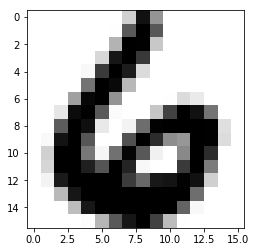

In [15]:
plt.imshow(-zipdata[0, 1:].reshape(16,16), "gray")

In [16]:
zipdata[0,0]

6.0

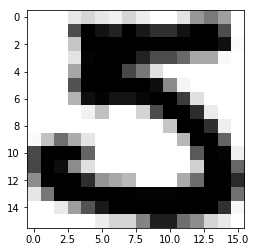

In [17]:
plt.imshow(-zipdata[1, 1:].reshape(16,16), "gray")

In [18]:
zipdata[1,0]

5.0

# Numpy
It is important that you feel comfortable with numpy array, concatenating, deleting, reshaping, etc. Here I provide you some examples.



# Select
Let's images that only contain value 3, and visualiza a random sample of such images

In [19]:
zipdata3=zipdata[zipdata[:, 0] == 3]
zipdata3.shape
# only 658 samples are 3

(658, 257)

In [20]:
# let's visualize 10 random sample of them
np.random.seed(1)
random3=np.random.choice(range(len(zipdata3)), size=20, replace = False)          

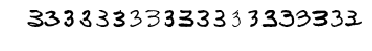

In [21]:
zipdata3stack = zipdata3[random3[0], 1:].reshape(16, 16)

for i in range(1,len(random3)):
    zipdata3stack = np.hstack((zipdata3stack, zipdata3[random3[i],1:].reshape(16, 16)))

plt.imshow(-zipdata3stack,"gray");
plt.axis("off");

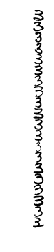

In [22]:
# You may want to plot vertically
# This is a more clever coding, we do not need  "for" loop
plt.imshow(-zipdata3[random3,1:].reshape(320,16),"gray");
plt.axis("off");

In [23]:
zipdata8=zipdata[zipdata[:, 0] == 8]
zipdata8.shape
# only 658 samples are 3

(542, 257)

In [24]:
zipdata38 = np.vstack([zipdata3, zipdata8])
zipdata38.shape

(1200, 257)

In [25]:
pca = PCA(n_components=2)
# remove the first column (image label)
pca.fit(zipdata38[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
Z = pca.transform(zipdata38[:,1:])

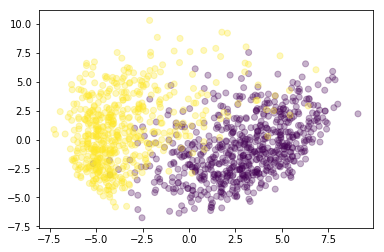

In [27]:

plt.scatter(Z[:,0], Z[:,1], c= zipdata38[:,0], alpha=0.3);


In [28]:
# Let's make it more visual


(-10, 10)

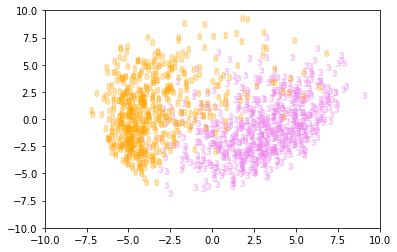

In [29]:
plt.scatter(Z[zipdata38[:,0]==3,0], Z[zipdata38[:,0]==3,1], marker='$3$', 
            color='violet', alpha = 0.3);

plt.scatter(Z[zipdata38[:,0]==8,0], Z[zipdata38[:,0]==8,1], marker='$8$', 
            color='orange', alpha = 0.3);

plt.xlim([-10,10])
plt.ylim([-10,10])